# Random Forest - Model Training (FFT + Statistical)

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [78]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

## Import Dataset

In [79]:
dataset = pd.read_csv('Dataset/fft_combined_metrics.csv')

## Visualize Dataset

In [80]:
dataset.head()

,Mean_X,Std Dev_X,Energy_X,Entropy_X,Peaks_X,Mean_Y,Std Dev_Y,Energy_Y,Entropy_Y,Peaks_Y,...,Std Dev_Z,Energy_Z,Entropy_Z,Peaks_Z,Mean_Mixed,Std Dev_Mixed,Energy_Mixed,Entropy_Mixed,Peaks_Mixed,category
0,1.172719,0.953548,228.452251,2.865350,29,1.931631,1.361601,558.515526,3.218825,31,...,0.658508,130.824569,3.302440,32,1.443353,2.654877,913.163896,0.613507,36,1
1,1.163221,0.958761,227.230673,2.881920,29,1.952115,1.346225,562.307429,3.220042,31,...,0.667691,133.851993,3.386925,30,1.449463,2.662081,918.761645,0.613295,36,1
2,1.182756,0.936522,227.598408,2.218724,29,1.957486,1.349040,565.166173,3.321991,31,...,0.670604,135.547673,3.013327,32,1.448431,2.671869,923.683803,0.612855,36,1
3,1.175147,0.940437,226.539145,2.278367,29,2.011669,1.374634,593.642824,3.225947,34,...,0.684978,138.293642,3.495668,31,1.498116,2.700763,953.847164,0.611485,34,1
4,1.171057,0.945039,226.447322,2.310572,29,2.023791,1.413078,609.251935,3.003790,32,...,0.696539,139.649782,3.947268,29,1.505199,2.727926,970.720591,0.610666,36,1


In [81]:
print(dataset.isnull().sum())

Mean_X           0
Std Dev_X        0
Energy_X         0
Entropy_X        0
Peaks_X          0
Mean_Y           0
Std Dev_Y        0
Energy_Y         0
Entropy_Y        0
Peaks_Y          0
Mean_Z           0
Std Dev_Z        0
Energy_Z         0
Entropy_Z        0
Peaks_Z          0
Mean_Mixed       0
Std Dev_Mixed    0
Energy_Mixed     0
Entropy_Mixed    0
Peaks_Mixed      0
category         0
dtype: int64


## Seperate X-Y values, Train-Test values

In [82]:
X = dataset[::-1]
Y = dataset['category']

## Train the Model - Basics

### Train the Model

In [83]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

model = RandomForestClassifier(n_estimators=50)
model.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=50)

### Predict test set from the model and check accuracy

In [84]:
predict = model.predict(X_test)

In [85]:
accuracy_score(Y_test, predict)

0.9949664429530202

In [86]:
confusion_matrix(Y_test, predict)

array([[253,   1,   0,   0,   0],
       [  0, 233,   0,   0,   0],
       [  0,   2, 239,   0,   0],
       [  0,   0,   1, 234,   2],
       [  0,   0,   0,   0, 227]], dtype=int64)

In [87]:
print(classification_report(Y_test, predict))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       254
           2       0.99      1.00      0.99       233
           3       1.00      0.99      0.99       241
           4       1.00      0.99      0.99       237
           5       0.99      1.00      1.00       227

    accuracy                           0.99      1192
   macro avg       0.99      1.00      0.99      1192
weighted avg       1.00      0.99      0.99      1192



### Cross validation 

In [88]:
scores = cross_val_score(model, X, Y, cv=5) # 5-fold cross-validation

print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())

Cross-validation scores: [0.86666667 0.98867925 0.98993711 1.         0.74433249]
Mean cross-validation score: 0.9179231025141391


## Train the Model - Finding the BEST Case

In [89]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=42)

### Find: Test set and Training set split value

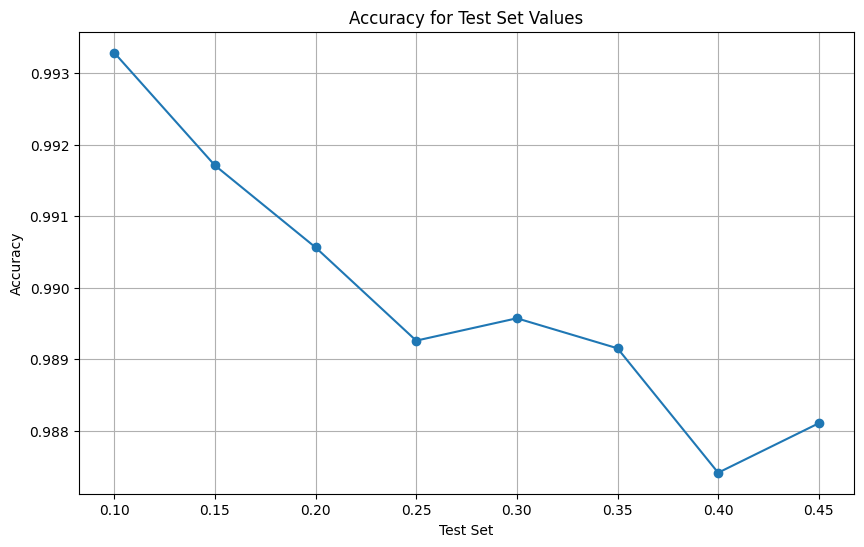

In [90]:
test_size_range = np.arange(0.1, 0.5, 0.05)
test_size_scores = []

for test_size in test_size_range:
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=42)
    modelRF = RandomForestClassifier(n_estimators=5, random_state=42) # 5 decision trees
    scores = cross_val_score(modelRF, X_train, Y_train, cv=10)  # 10-fold cross validation
    test_size_scores.append(scores.mean()) # Mean accuracy score

plt.figure(figsize=(10, 6))
plt.plot(test_size_range, test_size_scores, marker='o')
plt.title('Accuracy for Test Set Values')
plt.xlabel('Test Set')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [91]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

### Find: No.of Decision Trees

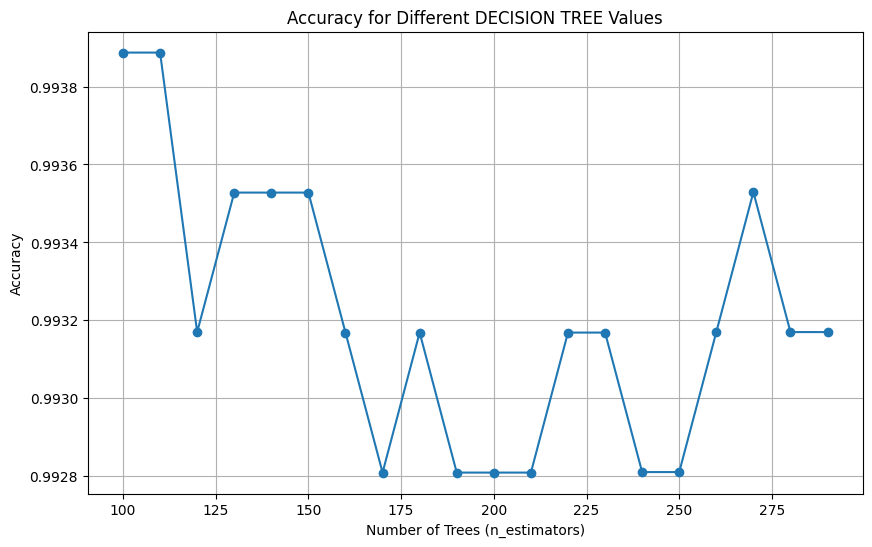

The optimal number of trees is 100 with cross-validation accuracy of 0.9939


In [92]:
n_estimators_range = range(100, 300, 10)  # n_estimators: DECISION TREES
accuracy_scores = []

for n_estimator in n_estimators_range:
    modelRF = RandomForestClassifier(n_estimators=n_estimator, random_state=42)
    scores = cross_val_score(modelRF, X_train, Y_train, cv=10)  # 10-fold cross validation
    accuracy_scores.append(scores.mean()) # Mean cross-validation score

# Plot the cross-validation accuracy against n_estimators values
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, accuracy_scores, marker='o')
plt.title('Accuracy for Different DECISION TREE Values')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# Find and print the optimal n_estimators value
optimal_n_estimators = n_estimators_range[np.argmax(accuracy_scores)]
print(f"The optimal number of trees is {optimal_n_estimators} with cross-validation accuracy of {max(accuracy_scores):.4f}")

### Find: No.of Cross Validation

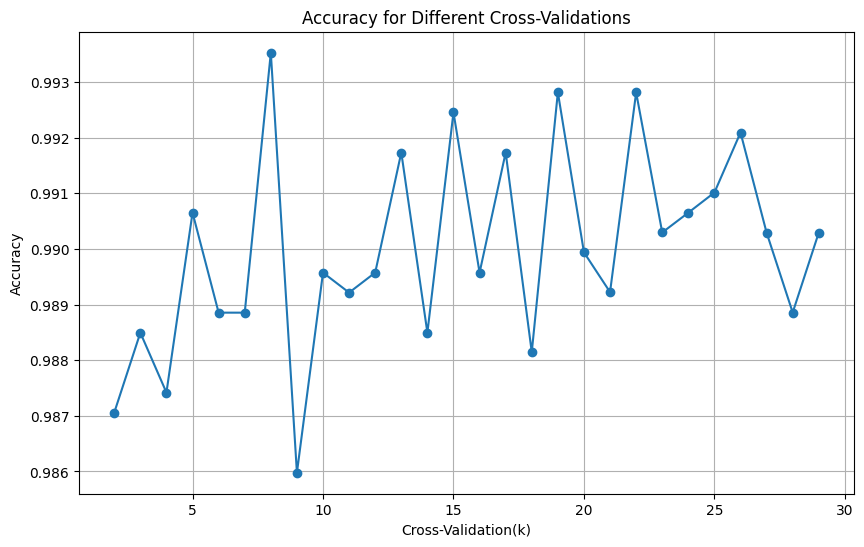

Best Accuracy: 0.9935 when cross validation is 8


In [95]:
cross_validation_range = range(2, 30, 1)  
accuracy_on_cross_validation = []

for kVal in cross_validation_range:
    modelRF = RandomForestClassifier(n_estimators=5, random_state=42) # 5 decision trees
    scores = cross_val_score(modelRF, X_train, Y_train, cv=kVal)  
    accuracy_on_cross_validation.append(scores.mean()) # Mean score
       
plt.figure(figsize=(10, 6))
plt.plot(cross_validation_range, accuracy_on_cross_validation, marker='o')
plt.title('Accuracy for Different Cross-Validations')
plt.xlabel('Cross-Validation(k)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# Find best Cross validations
best_cross_validation = cross_validation_range[np.argmax(accuracy_on_cross_validation)]
print(f"Best Accuracy: {max(accuracy_on_cross_validation):.4f} when cross validation is {best_cross_validation}")

# Best Model

In [96]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
scoreFinal = cross_val_score(modelRF, X_train, Y_train, cv=8)  

print("Cross-validation scores:", scoreFinal)
print("Mean cross-validation score:", scoreFinal.mean())

Cross-validation scores: [0.99137931 0.99712644 0.99425287 0.99425287 0.99137931 0.98847262
 0.99711816 0.99423631]
Mean cross-validation score: 0.9935272367418596
